<a href="https://colab.research.google.com/github/gotomanivannan/python-random-quote/blob/master/1_Test_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Part 1: Convolutional Neural Network

In [38]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')


Preparing Data Set

In [39]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [40]:
# Building a Model

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_5 (Dropout)         (None, 1600)             

In [41]:
# Model Training

In [42]:
batch_size = 128
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 42s 99ms/step - loss: 0.3548 - accuracy: 0.8925 - val_loss: 0.0819 - val_accuracy: 0.9792
Epoch 2/5
422/422 [==============================] - 41s 98ms/step - loss: 0.1147 - accuracy: 0.9648 - val_loss: 0.0583 - val_accuracy: 0.9838
Epoch 3/5
422/422 [==============================] - 41s 98ms/step - loss: 0.0851 - accuracy: 0.9737 - val_loss: 0.0465 - val_accuracy: 0.9878
Epoch 4/5
422/422 [==============================] - 42s 100ms/step - loss: 0.0739 - accuracy: 0.9774 - val_loss: 0.0453 - val_accuracy: 0.9870
Epoch 5/5
422/422 [==============================] - 41s 98ms/step - loss: 0.0640 - accuracy: 0.9805 - val_loss: 0.0399 - val_accuracy: 0.9888


In [43]:
# Evaluate the trained model

In [44]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03643246740102768
Test accuracy: 0.9879999756813049


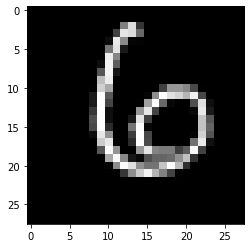

In [52]:
import pylab as plt

plt.imshow(x_test[100].reshape(28,28),cmap='gray')
plt.show()

In [56]:
import numpy as np
prediction = model.predict(x_test[100:101])
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [2.2048791e-05 3.7652274e-08 4.0424744e-08 1.6899008e-09 8.4056620e-07
 1.4770142e-05 9.9995899e-01 2.6807436e-08 3.2719604e-06 8.1634184e-09]

Thresholded Score:
 [0 0 0 0 0 0 1 0 0 0]

Predicted Digit:
 6
